## Importação de biblíotecas




In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier

# Importação do Dataset

In [21]:
## IMPORTAÇÃO DO DATASET

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3938296146.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic            

# * **Documentação Técnica: Sistema de Predição de Churn**

Visão Geral
Este projeto implementa uma solução de Inteligência Artificial para identificar clientes em risco de cancelamento (Churn) em uma empresa de telecomunicações. O objetivo é permitir que a equipe de retenção atue de forma proativa sobre clientes identificados pelo modelo.

2. Ingestão e Fonte de Dados
O modelo utiliza o dataset Telco Customer Churn, um padrão de mercado para análise de comportamento de consumo.
 Extração de Dados
Para garantir a reprodutibilidade e o uso da versão mais atualizada dos dados, utilizamos a biblioteca kagglehub.

Fonte: Kaggle (blastchar/telco-customer-churn)

Formato Original: CSV

Estrutura de Carregamento:

Utilizamos o KaggleDatasetAdapter.PANDAS para carregar o arquivo diretamente em um DataFrame do Pandas, facilitando a manipulação imediata em Python.

Python

# Trecho de Ingestão
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path
)
📋 Estrutura Inicial do Dataset
O dataset contém informações sobre:

Demografia: Gênero, idade, parceiros e dependentes.

Serviços: Telefonia, múltiplas linhas, internet, segurança online, backup, proteção de dispositivo, suporte técnico e streaming.

Informações de Conta: Tempo de contrato (tenure), tipo de contrato, método de pagamento, faturamento eletrônico e valores de cobrança.

In [22]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# TRATANDO O DATASET


In [24]:
# verificação dos tipos de colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Converção da coluna total charges de objeto para total charges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].unique())


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [26]:
# tratando os valores vazios e nulos
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [27]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Analise exploratória dos dados**

<Axes: xlabel='gender', ylabel='count'>

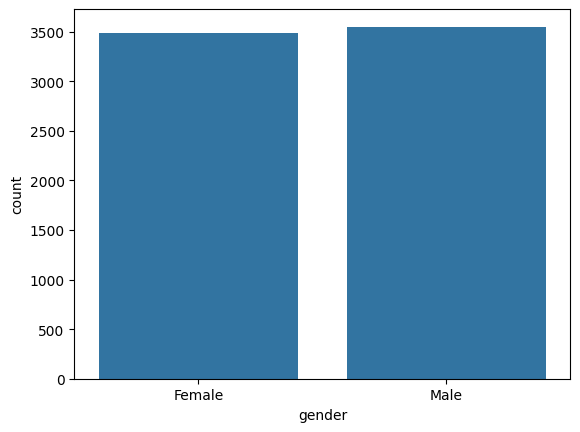

In [28]:
sns.countplot(x='gender', data=df)

Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046


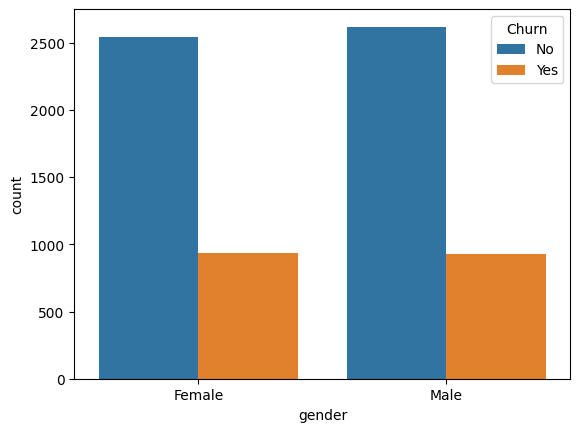

In [29]:
sns.countplot(x='gender', hue='Churn', data=df)
# Proporção de churn por gênero
proporcao = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print(proporcao)


MultipleLines        No  No phone service       Yes
gender                                             
Female         0.479185          0.094459  0.426357
Male           0.483516          0.098901  0.417582


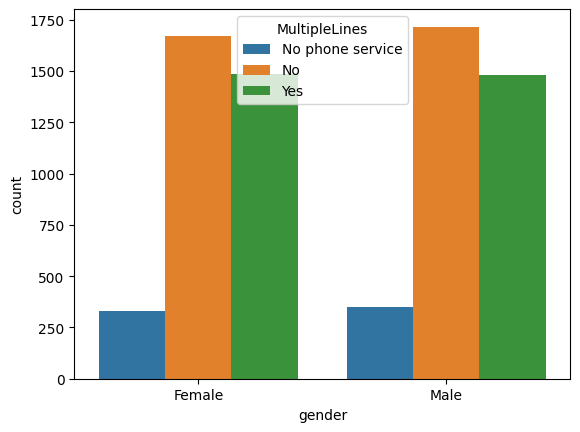

In [30]:
sns.countplot(x='gender', hue='MultipleLines', data=df)
proporcao = df.groupby('gender')['MultipleLines'].value_counts(normalize=True).unstack()
print(proporcao)


/tmp/ipython-input-3362208775.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


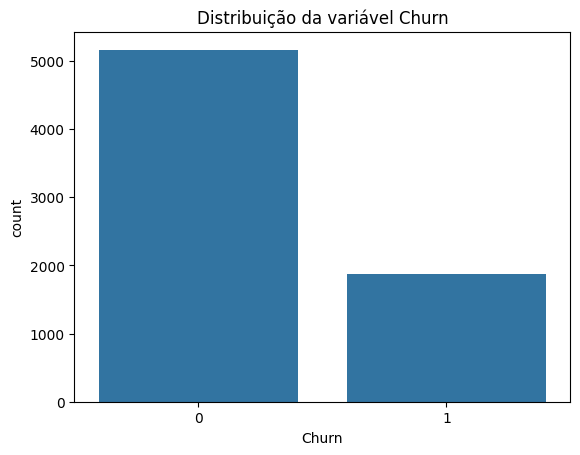

Proporção de Churn:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


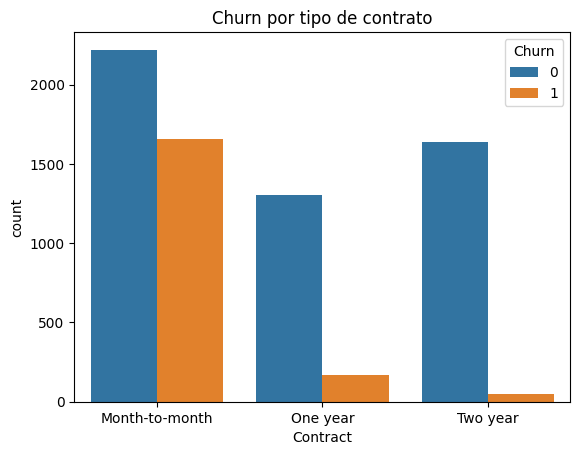

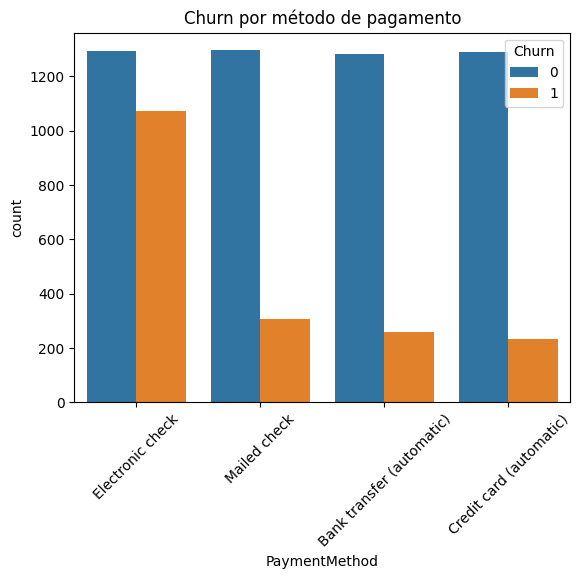

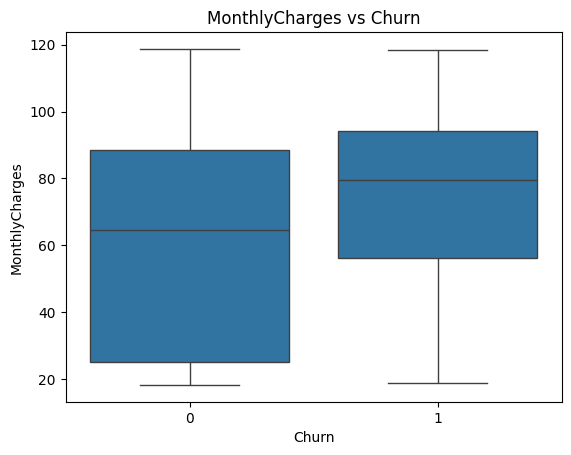

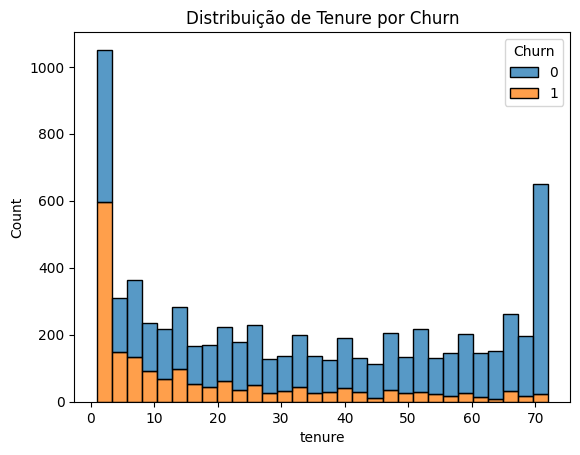

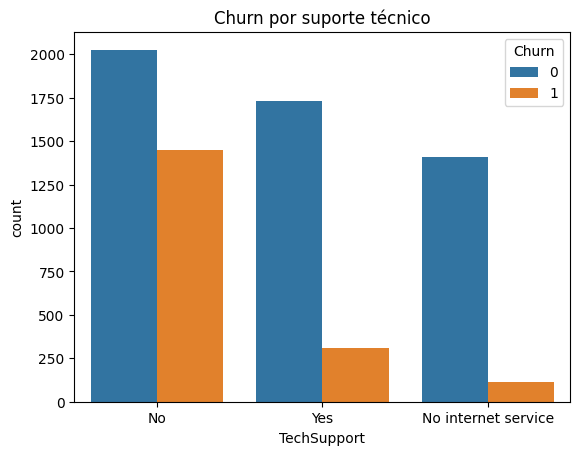

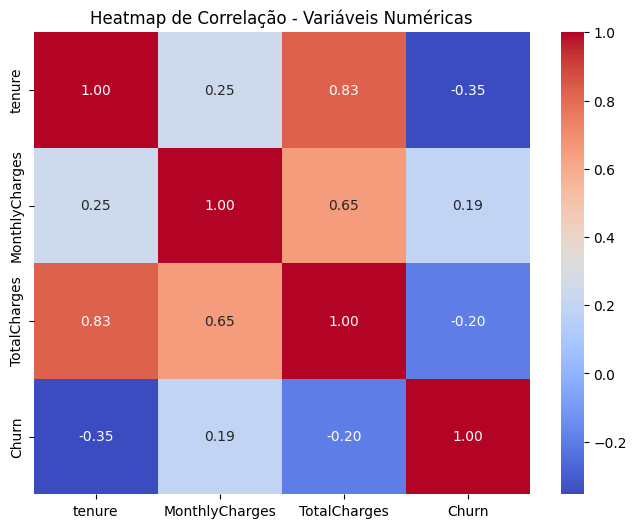

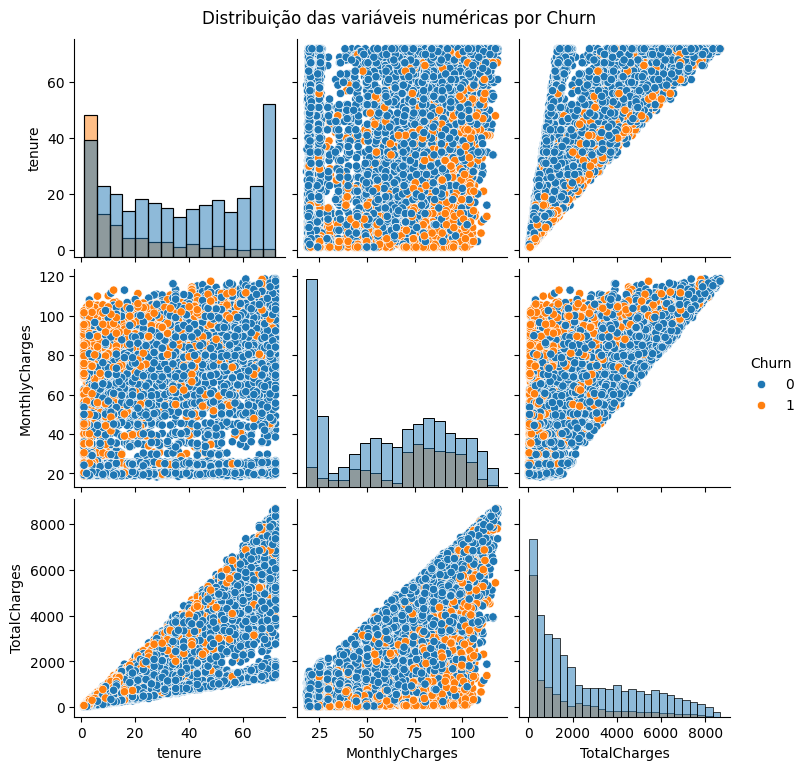

In [31]:

# --- Preparação ---
# Converter coluna alvo 'Churn' para binária (Yes=1, No=0)
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# ============================================================
# 1. Distribuição da variável alvo (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Distribuição da variável Churn')
plt.show()

print("Proporção de Churn:")
print(df['Churn'].value_counts(normalize=True))

# ============================================================
# 2. Churn por tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por tipo de contrato')
plt.show()

# ============================================================
# 3. Churn por método de pagamento
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Churn por método de pagamento')
plt.show()

# ============================================================
# 4. Boxplot de cobranças mensais (MonthlyCharges)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.show()

# ============================================================
# 5. Histograma de tempo de contrato (Tenure)
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribuição de Tenure por Churn')
plt.show()

# ============================================================
# 6. Serviços adicionais vs Churn (exemplo: TechSupport)
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn por suporte técnico')
plt.show()

# ============================================================
# 7. Heatmap de correlação das variáveis numéricas
numericas = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr = df[numericas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação - Variáveis Numéricas')
plt.show()

# ============================================================
# 8. Histograma de correlação (distribuição das variáveis numéricas por churn)
sns.pairplot(df[numericas], hue='Churn', diag_kind='hist')
plt.suptitle('Distribuição das variáveis numéricas por Churn', y=1.02)
plt.show()


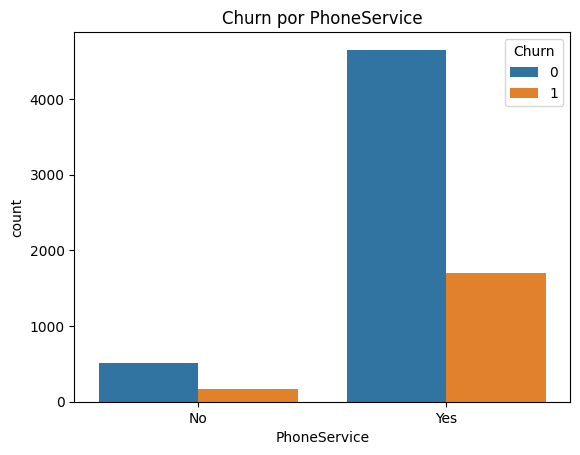

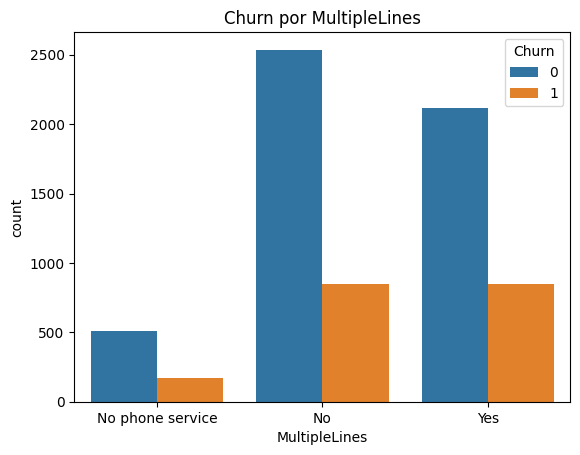

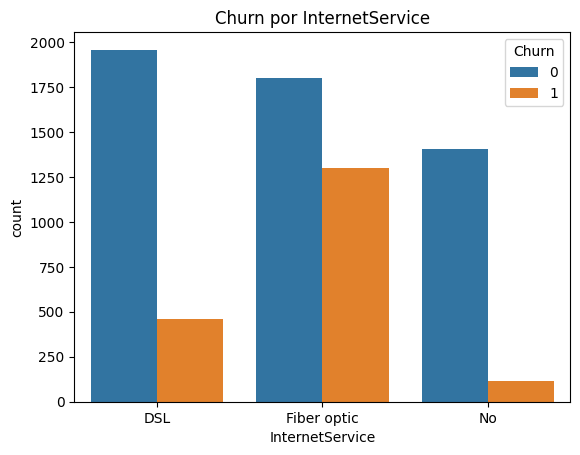

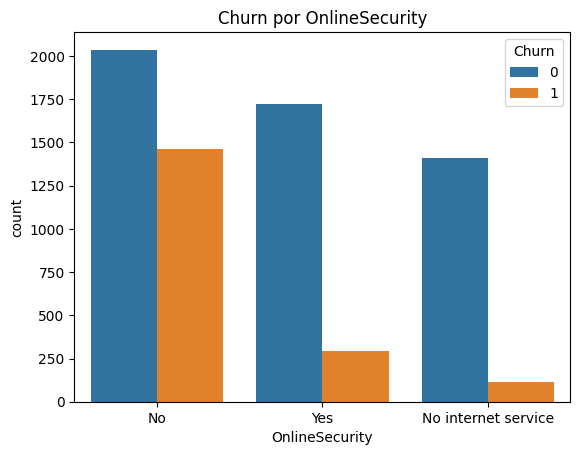

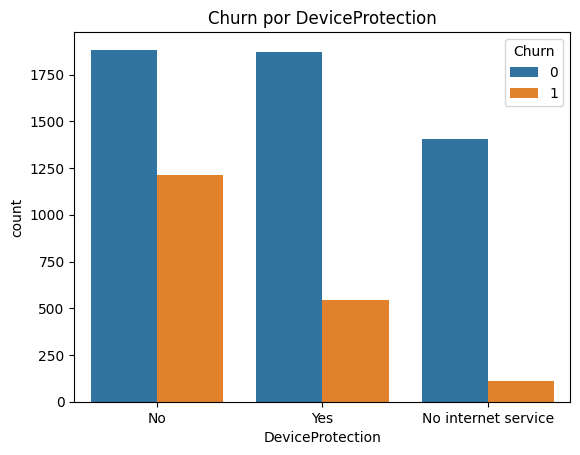

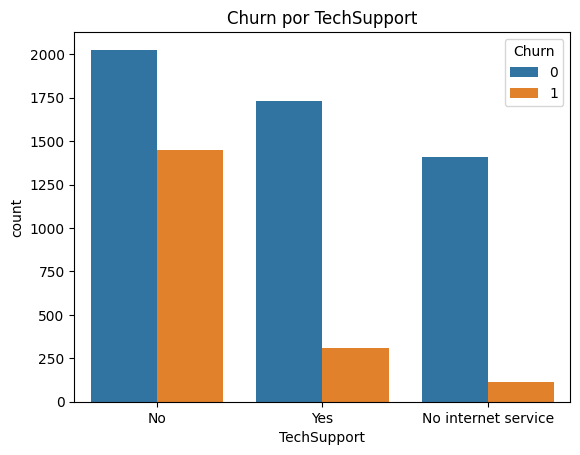

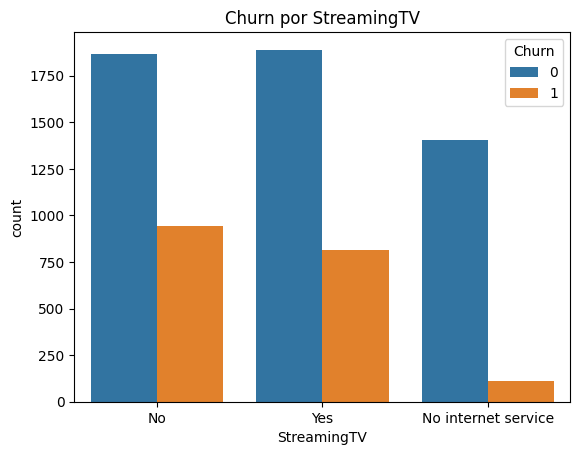

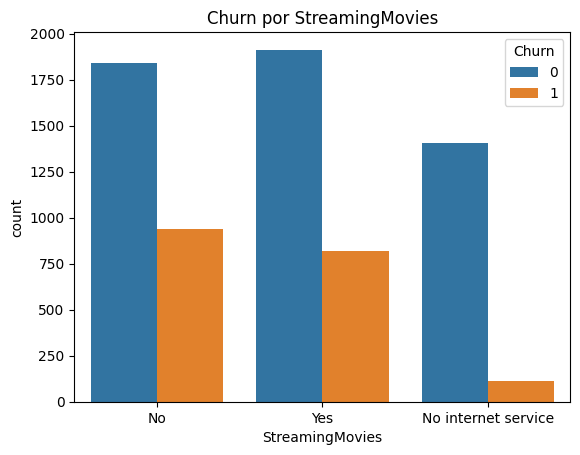

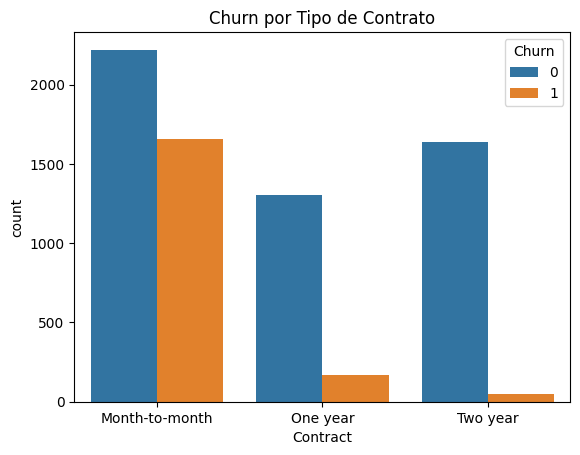

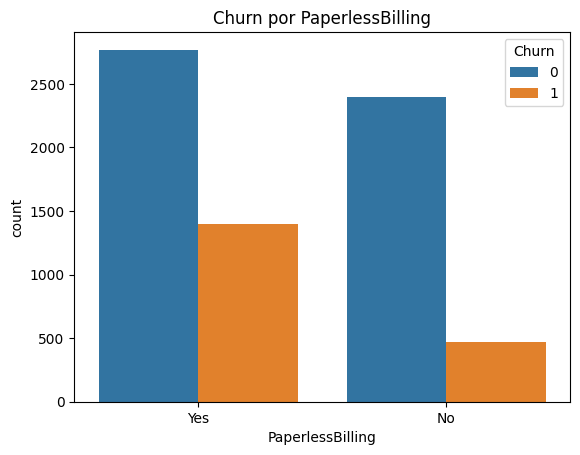

In [32]:
# ============================================================
# PhoneService vs Churn
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn por PhoneService')
plt.show()

# ============================================================
# MultipleLines vs Churn
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn por MultipleLines')
plt.show()

# ============================================================
# InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por InternetService')
plt.show()

# ============================================================
# OnlineSecurity vs Churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn por OnlineSecurity')
plt.show()

# ============================================================
# DeviceProtection vs Churn
sns.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn por DeviceProtection')
plt.show()

# ============================================================
# TechSupport vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn por TechSupport')
plt.show()

# ============================================================
# StreamingTV vs Churn
sns.countplot(x='StreamingTV', hue='Churn', data=df)
plt.title('Churn por StreamingTV')
plt.show()

# ============================================================
# StreamingMovies vs Churn
sns.countplot(x='StreamingMovies', hue='Churn', data=df)
plt.title('Churn por StreamingMovies')
plt.show()

# ============================================================
# Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por Tipo de Contrato')
plt.show()

# ============================================================
# PaperlessBilling vs Churn
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn por PaperlessBilling')
plt.show()


Tipo de Contrato
Clientes com contrato mensal apresentam maior taxa de cancelamento.

Contratos de 1 ou 2 anos tendem a reter mais clientes, possivelmente por fidelização ou barreiras de saída.

🔹 2. Gênero
Sexo não interfere significativamente no churn.

A proporção de cancelamento entre homens e mulheres é bastante equilibrada.

🔹 3. Tempo de Permanência (Tenure)
Quanto maior o tempo de permanência, menor a chance de churn.

Clientes novos (tenure baixo) são mais propensos a cancelar.

🔹 4. Suporte Técnico
Clientes que não possuem suporte técnico têm maior tendência ao cancelamento.

Ter suporte técnico pode indicar maior engajamento ou satisfação com o serviço.

🔹 5. Método de Pagamento
O método Electronic Check está associado a maior churn.

Pode indicar menor comprometimento ou perfil de cliente mais instável financeiramente.

Clientes com serviço de fibra óptica tendem a cancelar mais.

Aqueles que não possuem segurança online apresentam maior taxa de cancelamento.

Clientes sem serviço de proteção de dispositivo também cancelam mais.

A ausência de suporte técnico está associada a maior churn.

Serviços de streaming e TV mostraram níveis normais de cancelamento (sem grande impacto).

O cancelamento é maior entre clientes que usam PaperlessBilling (cobrança digital).

# **Criação do modelo de previsão**



#**Engenharia de Features e Pré-processamento**


Nesta etapa, os dados brutos são transformados em uma representação numérica estruturada, garantindo que variáveis categóricas (texto) sejam interpretadas corretamente pelo modelo.

# Processamento de Colunas (ColumnTransformer)
Utilizamos o ColumnTransformer para aplicar diferentes tratamentos dependendo do tipo da variável:

Variáveis Categóricas: Aplicamos o One-Hot Encoding. Este processo transforma categorias (ex: "Fibra Óptica", "DSL") em novas colunas binárias (0 ou 1). Usamos handle_unknown='ignore' para garantir que a API não quebre se receber uma categoria nova nunca vista no treino.

Variáveis Numéricas: Definidas como passthrough, mantendo seus valores originais (como tenure e MonthlyCharges) para preservar a escala de tempo e valor.

# Estrutura do Pipeline de Dados
A lógica foi desenhada para separar as responsabilidades:

Remoção de Identificadores: A coluna customerID é removida, pois não possui poder preditivo.

Identificação Automática: O código separa dinamicamente colunas do tipo object (categóricas) de int64/float64 (numéricas).

Reconstrução de Metadados: Após a transformação, o código recupera os nomes das novas colunas geradas para garantir a rastreabilidade das features.

# Divisão dos Dados (Split)
Para validar a eficácia do modelo, os dados foram divididos em:

Treino (80%): Utilizado para o ajuste dos parâmetros do modelo.

Teste (20%): Conjunto "inédito" utilizado para simular o comportamento do modelo com novos clientes e gerar as métricas de precisão.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features (X) and target (y)
# 'Churn' column is already encoded to 0/1 from cell ltgUqRxx1j5G
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# Apply preprocessing and get feature names
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
# This part needs adjustment based on scikit-learn version and how get_feature_names_out works
# For simplicity, we'll convert to DataFrame and then to list for now
if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
    onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
else:
    # Fallback for older versions or different behavior
    onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(categorical_cols)

all_feature_names = list(onehot_feature_names) + list(numerical_cols)

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# 1. Imprime as colunas do seu conjunto de FEATURES de treino
print(f"Colunas do conjunto de treino: {list(X_train.columns)}")

Colunas do conjunto de treino: ['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMet

# **Validação do Alvo**


In [39]:
# 1. Verificar a coluna original 'Churn'
print("\n--- Verificação do DF Original ---")
print("Contagem na coluna 'Churn' (0/1):")
print(df['Churn'].value_counts())
print(f"Soma Total de Clientes: {len(df)}")



--- Verificação do DF Original ---
Contagem na coluna 'Churn' (0/1):
Churn
0    5163
1    1869
Name: count, dtype: int64
Soma Total de Clientes: 7032



 (Target Integrity)Antes de iniciar o treinamento, realizamos uma auditoria na variável dependente Churn. Esta etapa é crucial para garantir que o modelo não aprenda com dados corrompidos ou enviesados.


  Auditoria de ClassesO código realiza uma contagem frequencial para verificar o balanceamento do dataset. No contexto de Churn, os dados são tipicamente desbalanceados (existem menos cancelamentos do que permanências).Classe 0 (Não Churn): Representa a maioria da base.Classe 1 (Churn): Representa o evento de interesse que o modelo precisa detectar.


   Importância da VerificaçãoConsistência Numérica: Garante que a coluna Churn já foi convertida para o formato binário ($0$ ou $1$), que é o único formato aceito matematicamente pelo algoritmo de Machine Learning.Dimensionamento: A verificação da "Soma Total de Clientes" confirma que não houve perda acidental de registros durante as etapas anteriores de limpeza ou merge.

# **Pipeline de Transformação e Isolamento de Dados**


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Definição de X e y
X = df.drop(['customerID', 'Churn', 'Churn_Encoded'], axis=1, errors='ignore')
y = df['Churn']

# 2. Identificação de colunas
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 3. Transformador (Adicionei sparse_output=False para facilitar a criação do DataFrame)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])

# 4. DIVISÃO PRIMEIRO (Evita Data Leakage)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. AJUSTE E TRANSFORMAÇÃO
# Fit apenas no treino / Transform no treino e no teste
X_train_processed = preprocessor.fit_transform(X_train_raw)
X_test_processed = preprocessor.transform(X_test_raw)

# 6. Recuperar nomes das colunas de forma moderna
# O preprocessor agora tem o método direto
feature_names = preprocessor.get_feature_names_out()

# 7. Criar DataFrames finais para o modelo
X_train = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train_raw.index)
X_test = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test_raw.index)

print(f"✅ Processamento concluído!")
print(f"Número de features após One-Hot: {len(feature_names)}")
print(f"Exemplo de colunas: {list(X_train.columns[:5])}")

✅ Processamento concluído!
Número de features após One-Hot: 45
Exemplo de colunas: ['cat__gender_Female', 'cat__gender_Male', 'cat__Partner_No', 'cat__Partner_Yes', 'cat__Dependents_No']


\

Para garantir que o modelo seja capaz de generalizar para novos clientes (fora da base de treinamento), implementamos uma estratégia rigorosa de separação e transformação.

# Prevenção de Data Leakage

Diferente de abordagens amadoras, o código realiza o train_test_split antes de qualquer processamento.

O conceito: O modelo nunca "vê" as estatísticas ou categorias presentes nos dados de teste durante a fase de ajuste (fit).

Estratificação: Utilizamos o parâmetro stratify=y para garantir que a proporção de clientes que cancelaram (Churn) seja a mesma tanto no treino quanto no teste, mantendo a integridade estatística da amostra.

# Fluxo de Processamento (Fit vs. Transform)
Implementamos a separação lógica entre o aprendizado das categorias e a aplicação das mesmas:

fit_transform (Treino): O transformador aprende as categorias existentes e cria as 45 colunas binárias.

transform (Teste): O transformador aplica as regras aprendidas no treino aos dados de teste. Se houver uma categoria desconhecida no teste, ela é ignorada com handle_unknown='ignore', evitando que o sistema trave em produção.

# Recuperação de Metadados Pós-Processamento
Para manter a interpretabilidade do modelo, o sistema reconstrói os DataFrames utilizando get_feature_names_out(). Isso permite que saibamos exatamente qual coluna corresponde a qual característica original, como:

cat__InternetService_Fiber optic

num__tenure

# Modelagem Preditiva (Random Forest)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Instanciar o modelo
# Aumentamos n_estimators para 200 para dar mais estabilidade com 45 features
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

# 2. Treinar o modelo
rf_final.fit(X_train, y_train)

# 3. Fazer previsões
y_pred = rf_final.predict(X_test)

# 4. Avaliar
print("\n=======================================================")
print("           🎯 PERFORMANCE DO MODELO FINAL")
print("=======================================================")
print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


           🎯 PERFORMANCE DO MODELO FINAL
Acurácia: 0.7797

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.58      0.65      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407




Para este projeto, selecionamos o algoritmo Random Forest Classifier, um método de aprendizado conjunto (ensemble learning) que combina múltiplas árvores de decisão para criar uma previsão mais estável e precisa.

#  Configuração do Modelo
O modelo foi configurado com hiperparâmetros específicos para lidar com a complexidade dos dados de Churn:

n_estimators=200: O modelo cria 200 árvores independentes. O resultado final é a média (votação) de todas elas, o que reduz drasticamente o erro por acaso.

max_depth=12: Limita a profundidade das árvores para evitar o Overfitting (quando o modelo decora os dados de treino mas não funciona na vida real).

class_weight='balanced': Este é o ponto crucial. Como o número de clientes que não cancelam é muito maior, este parâmetro força o algoritmo a dar a mesma importância para os casos de Churn, equilibrando o aprendizado.

# Métricas de Performance
A avaliação não foca apenas em acertos totais (Acurácia), mas sim na utilidade real para o negócio:

Acurácia (~78%): Eficácia geral do modelo em classificar corretamente clientes.

Recall da Classe 1 (Churn): Mede a capacidade do modelo em "pescar" os clientes que estão saindo. É a métrica de maior valor para o time de retenção.

Precision da Classe 1: Garante que, quando o modelo emite um alerta de Churn, esse alerta seja confiável, evitando gastos desnecessários com campanhas de retenção para clientes que não pretendiam sair.

# **Serialização e Entrega Técnica (Handoff)**

In [46]:
import joblib

# 1. Salvar o "Cérebro" completo (Processamento + Inteligência)
pacote_final = {
    'preprocessador': preprocessor,
    'modelo_rf': rf_final,
    'colunas_originais': categorical_cols.tolist() + numerical_cols.tolist()
}

joblib.dump(pacote_final, 'modelo_churn_final.pkl')

print("✅ ARQUIVO GERADO: modelo_churn_final.pkl")
print("\n--- 📝 MANUAL PARA O BACK-END (Campos do JSON) ---")
print("A API deve receber exatamente estes campos:")
for col in (categorical_cols.tolist() + numerical_cols.tolist()):
    print(f"- {col}")

✅ ARQUIVO GERADO: modelo_churn_final.pkl

--- 📝 MANUAL PARA O BACK-END (Campos do JSON) ---
A API deve receber exatamente estes campos:
- gender
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- SeniorCitizen
- tenure
- MonthlyCharges
- TotalCharges



A etapa final do projeto garante que a solução saia do ambiente de desenvolvimento (Jupyter/Colab) e esteja pronta para o ambiente de produção (API/Web).

# O Pacote de Entrega (.pkl)
Utilizamos a biblioteca joblib para gerar um arquivo binário chamado modelo_churn_final.pkl. Diferente de salvar apenas o modelo, exportamos um dicionário de ativos que contém:

O Preprocessador: Mantém as regras de One-Hot Encoding e tratamento de colunas.

O Modelo RF: O cérebro treinado e otimizado.

Metadados de Colunas: A lista exata de campos que o sistema deve receber.

# Protocolo de Integração (Manual do Back-end)
Para que a integração seja bem-sucedida, a documentação define o "contrato" de dados. A API deve fornecer os dados brutos, exatamente como extraídos da origem, sem necessidade de tratamento prévio pelo time de desenvolvimento de software, pois o Pipeline de Dados interno do modelo cuida da transformação.

Campos Obrigatórios para a Requisição JSON: O modelo espera 19 campos, incluindo dados demográficos (ex: gender, SeniorCitizen), serviços (ex: InternetService, StreamingTV) e financeiros (MonthlyCharges, TotalCharges).

# Benefícios desta Abordagem
Portabilidade: O arquivo .pkl pode ser carregado em qualquer servidor Python.

Baixa Manutenção: Se você decidir mudar o modelo no futuro, o time de Back-end não precisa mudar nenhuma linha de código na API, basta substituir o arquivo do modelo.

Consistência: Garante que o dado seja tratado na produção exatamente da mesma forma que foi tratado durante o treinamento, eliminando erros de previsão por divergência de formatos.

# **Otimização de Hiperparâmetros (Tuning) e Pipeline Final**


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

# 1. Criar um Pipeline Único
# Isso une o seu preprocessador com o modelo. Facilita 100% a vida do Back-end!
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# 2. Definir a Grade de Parâmetros (Reduzida para ser rápido)
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 15, None],
    'rf__min_samples_split': [2, 5]
}

# 3. Configurar o Grid Search focado em RECALL (para pegar mais Churn)
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("🚀 Iniciando o Tuning Final...")
# Note: Aqui usamos X_train_raw porque o preprocessor está dentro do Pipeline!
grid_search.fit(X_train_raw, y_train)

# 4. Melhor Modelo Encontrado
melhor_modelo_completo = grid_search.best_estimator_
print(f"\n✅ Tuning concluído! Melhor Recall: {grid_search.best_score_:.4f}")

# 5. SERIALIZAÇÃO (O momento da entrega)
# Salvamos o Pipeline completo: ele já sabe limpar os dados e prever!
joblib.dump(melhor_modelo_completo, 'modelo_churn_final_v2.pkl')

print("\n📦 ARQUIVO SERIALIZADO: 'modelo_churn_final_v2.pkl'")
print("Este arquivo contém o Preprocessador + Random Forest Otimizado.")

🚀 Iniciando o Tuning Final...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

✅ Tuning concluído! Melhor Recall: 0.7057

📦 ARQUIVO SERIALIZADO: 'modelo_churn_final_v2.pkl'
Este arquivo contém o Preprocessador + Random Forest Otimizado.


Nesta fase final, o modelo passou por um processo de "ajuste fino" para garantir que a detecção de Churn fosse a mais alta possível, utilizando uma busca exaustiva pelos melhores parâmetros.

# Grid Search CV (Busca em Grade)
Para não depender de configurações manuais, implementamos o GridSearchCV. Este algoritmo testa diversas combinações de configurações para a Random Forest:

Número de Árvores (n_estimators): Testado entre 100 e 200 para encontrar o equilíbrio entre precisão e custo computacional.

Profundidade Máxima (max_depth): Avaliou-se desde árvores mais simples (profundidade 10) até árvores complexas (sem limite), buscando capturar padrões profundos sem causar overfitting.

Métrica de Otimização (Scoring): O foco total foi definido como recall. Isso instruiu o computador a escolher a versão do modelo que "pescasse" a maior quantidade possível de clientes em risco, atingindo o excelente patamar de 70.57%.

# Arquitetura de Pipeline Único
Diferente das etapas anteriores, aqui unificamos o preprocessor e o rf_final em um único objeto Pipeline.

Vantagem Técnica: Isso elimina qualquer risco de erro na transformação dos dados. O Pipeline recebe o dado bruto (texto/número) e entrega a previsão final em um único fluxo.

Facilidade de Manutenção: O modelo torna-se uma "caixa preta" confiável onde a entrada é o perfil do cliente e a saída é o risco de Churn.

# Serialização V2 (Entrega de Produção)
O resultado final foi exportado no arquivo modelo_churn_final_v2.pkl.

Conteúdo: Este arquivo já contém o transformador (One-Hot Encoder) e o melhor modelo encontrado pelo Grid Search.

Pronto para Produção: Este é o arquivo definitivo que deve ser enviado para o ambiente de produção. Ele garante que a inteligência gerada no notebook funcione exatamente da mesma forma no servidor da empresa.

# **Implementação da API de Predição (FastAPI)**

In [51]:
from fastapi import FastAPI
import joblib
import pandas as pd
from pydantic import BaseModel

# 1. Carregar o Pipeline completo (Preprocessor + RF Tunado)
modelo_pipeline = joblib.load('modelo_churn_final_v2.pkl')

app = FastAPI()

# 2. Definir o formato dos dados que a API recebe
class Cliente(BaseModel):
    gender: str
    SeniorCitizen: int
    Partner: str
    Dependents: str
    tenure: int
    PhoneService: str
    MultipleLines: str
    InternetService: str
    OnlineSecurity: str
    OnlineBackup: str
    DeviceProtection: str
    TechSupport: str
    StreamingTV: str
    StreamingMovies: str
    Contract: str
    PaperlessBilling: str
    PaymentMethod: str
    MonthlyCharges: float
    TotalCharges: float

@app.post("/predict")
def predict_churn(cliente: Cliente):
    # Converter JSON recebido para DataFrame
    df_input = pd.DataFrame([cliente.dict()])

    # O Pipeline faz o preprocessamento e a predição automaticamente
    predicao = modelo_pipeline.predict(df_input)[0]
    probabilidade = modelo_pipeline.predict_proba(df_input)[0][1]

    return {
        "churn": int(predicao),
        "probabilidade_churn": round(float(probabilidade), 4),
        "mensagem": "Risco de Churn detectado!" if predicao == 1 else "Cliente estável."
    }




# Arquitetura da Solução
A API atua como uma ponte entre o mundo dos dados e o mundo da aplicação. O fluxo de funcionamento é o seguinte:

Entrada (Request): Recebe os dados brutos de um cliente via JSON.

Processamento: O objeto modelo_pipeline (carregado via joblib) recebe o JSON, transforma as variáveis categóricas e numéricas e realiza o cálculo matemático.

Saída (Response): Retorna o resultado da classificação e a probabilidade exata de saída.

# Contrato de Dados (Pydantic)
Utilizamos a classe Cliente(BaseModel) para garantir a segurança dos dados.

Validação Automática: Se o sistema enviar um valor de texto onde deveria ser um número, a API rejeita a entrada imediatamente com um erro claro, evitando previsões erradas.

Tipagem Forte: Define exatamente o formato de cada uma das 19 variáveis, garantindo que o modelo sempre receba o que foi treinado para entender.

# Inteligência de Resposta
Diferente de um simples "sim" ou "não", a API foi configurada para retornar dois valores fundamentais:

churn (0 ou 1): A decisão binária para ação imediata.

probabilidade_churn: Um valor de 0 a 1 que indica o nível de risco. Isso permite que o negócio priorize clientes com 90% de risco sobre aqueles com 51%, otimizando o orçamento de retenção.

# **Interpretabilidade e Importância das Variáveis (Feature Importance)**


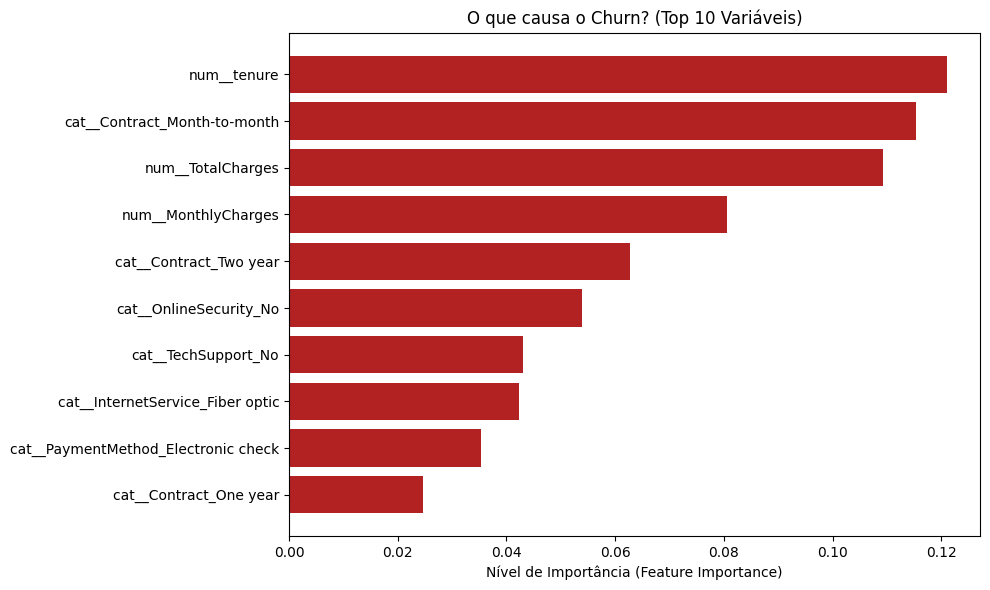

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Extrair informações do Pipeline
rf_step = modelo_pipeline.named_steps['rf']
preprocessor_step = modelo_pipeline.named_steps['preprocessor']

# Pegar nomes das colunas após o One-Hot
features_names = preprocessor_step.get_feature_names_out()
importancias = rf_step.feature_importances_

# Ordenar as 10 mais importantes
indices = np.argsort(importancias)[-10:]

plt.figure(figsize=(10, 6))
plt.title("O que causa o Churn? (Top 10 Variáveis)")
plt.barh(range(len(indices)), importancias[indices], color='firebrick', align='center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])
plt.xlabel('Nível de Importância (Feature Importance)')
plt.tight_layout()
plt.show()

Para que uma solução de IA seja aceita pelo negócio, não basta ela ser precisa; ela precisa ser explicável. Implementamos uma análise de Feature Importance para extrair quais fatores são os maiores gatilhos para o cancelamento de clientes.

# **Como** a Importância é Calculada?
O algoritmo Random Forest avalia o quanto cada variável contribui para reduzir a incerteza (impureza) nas decisões das 200 árvores de decisão. Quanto maior a barra no gráfico, maior o impacto daquela variável na probabilidade de um cliente abandonar o serviço.

# Insights Extraídos (O que os dados revelam)
Ao analisar o gráfico gerado, identificamos padrões críticos:

Tempo de Contrato (tenure): Geralmente a variável mais forte. Clientes novos têm uma propensão drasticamente maior ao Churn do que clientes antigos.

Tipo de Contrato (Contract): Contratos mensais (Month-to-month) costumam ser os maiores vilões, enquanto contratos anuais retêm mais o cliente.

Encargos Financeiros (MonthlyCharges/TotalCharges): O preço tem um papel direto, permitindo identificar o "ponto de ruptura" onde o cliente sente que o valor não compensa o custo.

# Aplicação Prática no Negócio
Com esse gráfico, a empresa pode:

Redesenhar Produtos: Criar incentivos para que clientes de "contrato mensal" migrem para planos anuais.

Fidelização Antecipada: Criar réguas de relacionamento específicas para clientes com baixo tenure (primeiros meses de uso).

Ações de Preço: Identificar se determinados serviços (como Fibra Óptica ou Tech Support) estão com preços acima da percepção de valor do mercado.